# Building & Training a Deep Neural Network Model

## Reading Model Summary Example

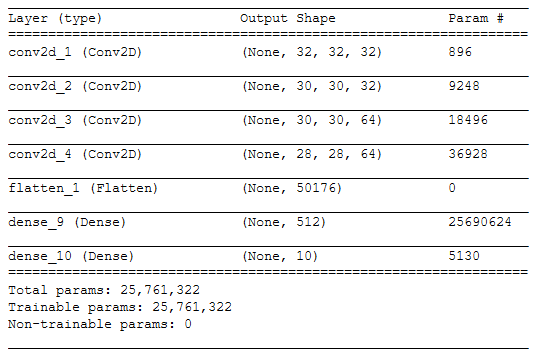

In [3]:
from PIL import Image
Image.open('Images/21-network-summary.png')

### How to Read Model Summary: 7 Layers

Alright, we can see the neural network now has seven layers. 

We have four convolutional layers, the flattened layer, and then our two dense layers. Notice that each layer also has a number of parameters listed. This is the total number of weights in that layer. 

There's also a total number at the bottom for the whole network. As we add more layers that total number will keep increasing. This is the size or complexity of our neural network. The larger the number, the longer it'll take to train and the more data we'll need to train it. 

It's a good idea to keep an eye on this number as you add layers to your neural network. As you test and refine your neural network, you might find that you can get good results even after you remove some of your layers and reduce this number. 

## A More Complex Summary

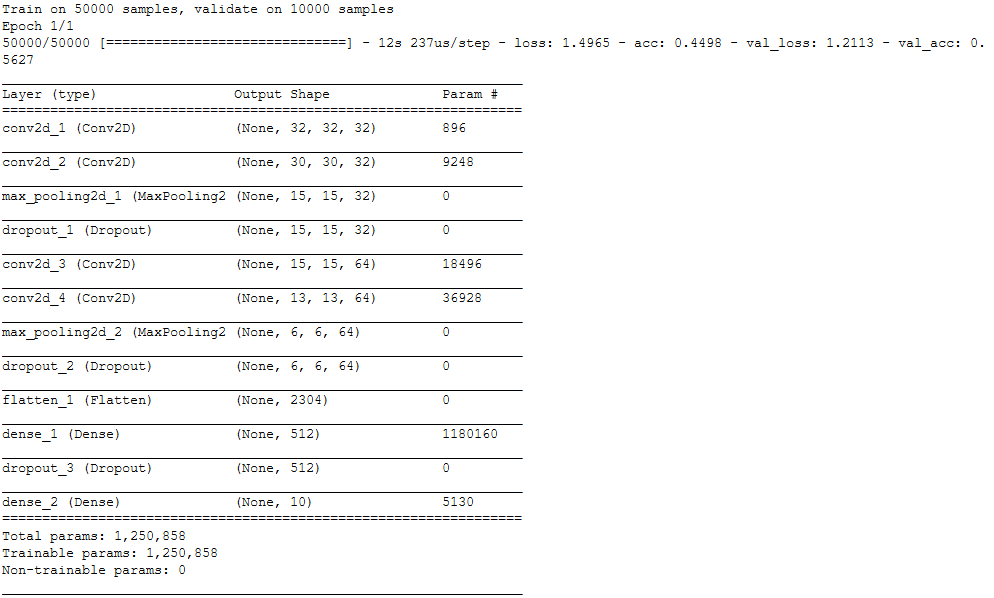

In [7]:
Image.open('Images/22-full-nn-summary.png')

## Show Comments - Training (No Prediction)

In [5]:
import keras
from keras.datasets import cifar10
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

####################################################################################
###### Load & clean the data to a usable format
####################################################################################

# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

'''
 Neural networks work best when the input data are floating point values in between 
 zero and one. Normally images are stored as integer values for each pixel is a number 
 between zero and 255. So to use this data, we need to convert it from integer the floating 
 point and then we need to make sure all the values are between zero and one. 
 Let's convert the data to floating point values. We can do that by using the as type function 
 and passing in float 32. 
'''

# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255 # divide NumPy array by a single value
x_test = x_test / 255

'''
 Cifar10 provides the labels for each class as values from zero to nine. But since we are 
 creating a neural network with 10 outputs, we need a separate expected value for each of 
 those outputs. So we need to convert each label from a single number into an array with 10 elements. 
 In that array, one element should be set to one and the rest set to zero. This is something you'll 
 almost always need to do with your training data so keras provides a helper function.
'''

# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9 because CIFAR provides 10 classes
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0
y_train = keras.utils.to_categorical(y_train, 10) # pass in your array with the labels
y_test = keras.utils.to_categorical(y_test, 10)

####################################################################################
###### Creating the neural network
####################################################################################

''' 
 The simplest type of neural network has an input, 
 a densely connected layer and then an output. Let's start by creating that. 

 1. First, create a sequential model, sequential api lets us create a neural network by 
    adding new layers to it one at a time.  It's call sequential because you add each layer 
    in sequence and they automatically get connected together in that order.
'''

# Create a model and add layers
model = keras.models.Sequential() # create a new neural network object 

'''
  Add convolutional layers (32);
  
  1. Convolutional layers are able to look for patterns in an image, no matter where the pattern appears
  in the image. Add in a 2D layer for images (1D for sound waves)

  2. The first parameter is how many different filters should be in the layer? Each filter will be capable 
  of detecting one pattern in the image. We'll start with 32. 
  
  3. Next, we need to pass in the size of the window that we'll use when creating image tiles from each image. 
  Let's use a window size of 3x3 pixels.  This will split up the original image into 3x3 tiles.
  
  Add padding for edges;
  
   4. When we do that, we have to decide what to do with the edges of the image. If the image size isn't exactly 
   divisible by three, we'll have a few extra pixels left over on the edge. We can either throw that information 
   away, or we can add padding to the image. 
   
       Padding is just extra zeros added to the edge of the image to make the math work out. The terminology that 
       Keras uses here is a bit confusing. If we want to add extra padding to the image, it's called same padding. 
       
       There's complex historical reasons why researchers used the term same, but it's easier just to memorize it. 
       For this layer, we do want to have padding, so we'll pass in a parameter padding equals, and the string same, 
       and just like the normal dense layer, convolutional layers also need an activation function. 
'''

# Add a first convolutional layer object
#  params = (filters in the layer, window size, padding, af, input shape first layer)
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 

# Add in a second convolutional layer without padding since an image will not pass through this layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))

'''
  Add Max Pooling Layers 1;
  
   Max pooling is where we scale down the output of the convolutional layers by keeping only the largest values 
   and throwing away the smaller ones. This makes the neural network more efficient by throwing away the least 
   useful data and keeping the most useful data. Typically, we'll do max pooling right after a block of 
   convolutional layers. 
   
   1. Create a new max pooling 2D layer with the pool_size parameter with (2, 2). This parameter means that we'll 
   divide the image up into 2x2 squares and only take the large values from each 2x2 region. This will reduce the
   size of our image while keeping the most important values.
   
'''

# Add max pooling 2D layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

'''
  Add Dropout Layer (1);
  
   One of the problems with neural networks is that they can tend to memorize the input data instead of 
   actually learning how to tell different objects apart. We can force the neural network to try harder to 
   learn without memorizing the input data. 
   
   The idea is that between certain layers, we'll randomly throw away some of the data by cutting 
   some of the connections between the layers. This is called dropout. Usually we'll 
   add dropout right after max pulling layers, or after a group of dense layers. 
  
  1. Create a dropout layer with 25% dropout  
'''

model.add(keras.layers.Dropout(0.25))

'''
  Add convolutional layers (64);
  
  1. Create a second convolutionary layer with 64 filters the same way
'''

# Add in third layer with 64 filters with padding
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
          
# Add in fourth layer with 64 filters without padding
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))     

'''
   Add Max Pooling Layers 2;
   
   Instead of increasing the size of our neural network, they're actually helping us decrease the 
   size by scaling down the data that passes through them while keeping the most important values. 
   This will help us speed up the training process. 
   
   1. Create a second max pooling layer after the next two convolutionary layers the same way
'''

# Add max pooling 2D layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

'''
  Add Dropout Layer (2);
  
  1. Create a second dropout layer with 25% dropout
'''

model.add(keras.layers.Dropout(0.25))

'''
  Flatten Layer;
  
   Whenever we transition between convolutional layers and dense layers, we need to tell Keras that we're 
   no longer working with 2D data. To do that we need to create a flattened layer and add it to our network. 
   We can do that by calling model.add, and creating a new flattened layer, and there's no parameters required 
   for a flattened layer.
'''   

# Add a flatten layer
model.add(keras.layers.Flatten())

'''
  Add a new layer and pass in a Dense layer object;
  
  1.  First, we need to tell it how many nodes to include in the layer. Let's add 512 nodes 
  to this layer. So we'll just pass in 512. Next we need to tell it what activation function 
  we want to use for this layer. 
  
  Add Activation Function;  
  
  2. For a normal layer like this, a common choice is to use a rectified 
  linear unit or relu activation function. It's the standard choice when working with images because 
  it works well and is computationally efficient.
  
  Input shape for the first layer
  
  3.  All the images in our data set are 32 pixels by 32 pixels and have a red green and blue channel. 
  So for the input size we'll use 32 by 32 by 3.
  
'''

# Add a dense layer
model.add(keras.layers.Dense(512, activation='relu'))

'''
  Add Dropout Layer (3);
  
  1. Create a third dropout layer with 50% dropout
'''

model.add(keras.layers.Dropout(0.50))

'''
   Add an output layer;
   
   We'll need one node in the output layer for each kind of object we want to detect. The cifar10 data set has 
   10 different kinds of objects. Since we're detecting 10 different kinds of objects, we'll create a new dense 
   layer with 10 nodes. 
   
   1. So to do that we'll call model.add and we'll create a new dense object and we know it 
   needs 10 nodes. 
   
   Softmax Classification;
   
   When doing classification with more than one type of object, the output layer will almost 
   always use a softmax activation function. 
   
   What is softmax?
   
   The softmax activation function is a special function that makes sure all the output values from this 
   layer add up to exactly one. The idea is that each output is a value that represents the percent 
   likelihood that a certain type of object was detected. And all 10 values should add up to 100 % or 1. 
'''

# Add output layer
model.add(keras.layers.Dense(10, activation='softmax'))

'''
  Compile the model;
  
  When we compile it, we're telling Keras we actually want to create the neural network in memory. 
  We're also telling Keras how we'll be training it and measuring its accuracy. 

  1. Compile the model with parameters: loss, optimizer, metrics
  
      Loss
          Tell Keras how to check how right or wrong the guesses from our neural network are. 
          This is called the loss function.
          
      Optimizer
          Optimization algorithm we'll use to train the neural network called Adam.
          Adam stands for Adaptive Moment Estimation. 
          
      Metrics
           What metrics we want it to report during the training process. Pass in an array for multiple.
'''

# Compile the model
model.compile(
    loss='categorical_crossentropy', # binary_cross_entropy for 2
    optimizer='adam',
    metrics=['accuracy']
)

'''
  Train the model;
  
  
  1. model.fit() - pass in X and y
      
      parameters
      
      batch size - is how many images we want to feed into the network at once during training. 
      If we set the number too low, training will take a long time and might not ever finish. 
      If we set the number too high, we'll run out of memory on our computer. Typical batch sizes 
      are between 32 and 128 images

      epoch - decide how many times we wanna go through our training data set during the process. 
      One full pass through the entire training data set is called an epoch. For this example, 
      let's do 30 passes through the training data set. So, we'll pass in epochs equals 30. So, 
      we'll pass in epochs equals 30. The more passes through the data we do, the more chance the 
      neural network has to learn; but the longer the training process will take. And eventually 
      you'll hit a point where doing additional training doesn't help anymore
      
      validation data - unseen data to be tested on
      
      shuffle = true - make sure that keras randomizes the order of the training data. It's very important 
      that the neural network sees the training data batches in random order, so that the order of the 
      training data doesn't influence the training. 
'''

# Train the model
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=1, # 30 but set to 1 for time constraint purposes
          validation_data=(x_test, y_test),
          shuffle=True
)

'''
  Save neural network structure;

  Save the structure of the neural network itself. That includes which layers get created and the order
  their hooked together.
  
  1. Convert the structure of a neural network into JSON by calling the model dot to JSON function. 
  
  Now, we just need to write this JSON data to a text file.
  
  2.  First we'll create a new path object, so we'll say, 'f' for file equals path, and then we'll 
  pass in the name of the file we wanna create. So I'm just gonna call it model structure dot JSON. 
  
  3.  Then we just need to call the right text function of the path object and pass in the data 
  that we wanna write to the file.  So I'll do 'f' dot write text and the data that I want to write 
  is this model structure object, so I'll pass in model structure.
'''

# Save neural network structure
model_structure = model.to_json()
f = Path('model_structure.json')
f.write_text(model_structure) # model object

'''
  Save neural network trained weights;

  After saving the structure, we want to save the weights of the neural network. As a neural network is
  trained, the weights of each node are adjusted to control how the signals flow through the network.
  
  So by saving the weights, we are saving how the neural network actually works. The reason we save the structure
  separately from the weights is because often you'll train the same neural network multiple times with different
  settings or different training datasets.
  
  It's convenient to be able to load different sets of weights using the same neural network structure. So 
  first, let's save the neural network structure itself. 
  
  1. Use sample_weights() and save it into a binary format called HDF5. The HDF5 format is designed for saving
  and loading large binary files efficiently.
'''

# Save neural network's trained weights
model.sample_weights('model_weights.h5')

# Print a summary of the model
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 12s 237us/step - loss: 1.4965 - acc: 0.4498 - val_loss: 1.2113 - val_acc: 0.5627
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)  

## No Comments - Before Prediction

In [ ]:
import keras
from keras.datasets import cifar10
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

####################################################################################
###### Load & clean the data to a usable format
####################################################################################

# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

'''
 Neural networks work best when the input data are floating point values in between 
 zero and one. Normally images are stored as integer values for each pixel is a number 
 between zero and 255. So to use this data, we need to convert it from integer the floating 
 point and then we need to make sure all the values are between zero and one. 
 Let's convert the data to floating point values. We can do that by using the as type function 
 and passing in float 32. 
'''

# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255 # divide NumPy array by a single value
x_test = x_test / 255

'''
 Cifar10 provides the labels for each class as values from zero to nine. But since we are 
 creating a neural network with 10 outputs, we need a separate expected value for each of 
 those outputs. So we need to convert each label from a single number into an array with 10 elements. 
 In that array, one element should be set to one and the rest set to zero. This is something you'll 
 almost always need to do with your training data so keras provides a helper function.
'''

# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9 because CIFAR provides 10 classes
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0
y_train = keras.utils.to_categorical(y_train, 10) # pass in your array with the labels
y_test = keras.utils.to_categorical(y_test, 10)

####################################################################################
###### Creating the neural network
####################################################################################

''' 
 The simplest type of neural network has an input, 
 a densely connected layer and then an output. Let's start by creating that. 

 1. First, create a sequential model, sequential api lets us create a neural network by 
    adding new layers to it one at a time.  It's call sequential because you add each layer 
    in sequence and they automatically get connected together in that order.
'''

# Create a model and add layers
model = keras.models.Sequential() # create a new neural network object 

# Add a first convolutional layer object
#  params = (filters in the layer, window size, padding, af, input shape first layer)
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3))) 

# Add in a second convolutional layer without padding since an image will not pass through this layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))

# Add max pooling 2D layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))

# Add in third layer with 64 filters with padding
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
          
# Add in fourth layer with 64 filters without padding
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))     

# Add max pooling 2D layer
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer
model.add(keras.layers.Dropout(0.25))

# Add a flatten layer
model.add(keras.layers.Flatten())

# Add a dense layer
model.add(keras.layers.Dense(512, activation='relu'))

# Add a dropout layer
model.add(keras.layers.Dropout(0.50))

# Add output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy', # binary_cross_entropy for 2
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=1, # 30 but set to 1 for time constraint purposes
          validation_data=(x_test, y_test),
          shuffle=True
)

# Save neural network structure
model_structure = model.to_json()
f = Path('model_structure.json')
f.write_text(model_structure) # model object

# Save neural network's trained weights
model.sample_weights('model_weights.h5')

# Print a summary of the model
model.summary()

## Prediction

### Prediction Process

1. Load the json file that contains the model's structure

2. Recreate the Keras model object from the json data

3. Re-load the model's trained weights

4. Load an image file to test, resizing it to 32x32 pixels (as required by this model)

5. Convert the image to a numpy array

6. Add a fourth dimension to the image (since Keras expects a list of images, not a single image)

7. Make a prediction using the model

8. Since we are only testing one image, we only need to check the first result

9. We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.

10. Get the name of the most likely class


### Load the model and new data to predict (Single Picture)

This is image is a Frog - Likelihood: 1.000000


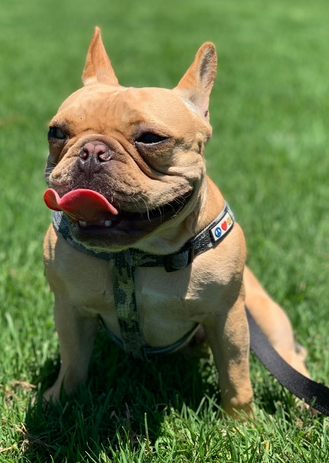

In [23]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

# These are the CIFAR10 class labels from the training data (in order from 0 to 9)
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

# Load the json file that contains the model's structure
f = Path('model_structure.json')
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load model's trained weights
model.load_weights('model_weights.h5')

# Load an image file to test, resizing it to 32x32 pixels (as required by the model)
img = image.load_img('Images/23-potato.png', target_size=(32, 32))

# Convert the image to a numpy array
image_to_test = image.img_to_array(img)

'''
  Important Formatting For New Data
  
   Right now, we're only testing one image with our neural network, but for efficiency reasons, 
   Keras lets you pass in batches of images at once, so you can run more than one image through 
   the neural network at one time. 
   
   So we need a batch of images to pass in, even though we're only 
   passing in this one image. Keras expects these batches as a four dimensional array. The first 
   dimension is the list of images, and the other three dimensions are the image data itself. 
   
   Here's a little trick. Since we only have this one image, we can turn it into a 4D array by 
   adding a new axis to it with NumPy. You can do this by calling a function called np.expand_dims 
   and passing the name of the array. So I'm gonna say, list of images = mp.expandims, and then I'm 
   gonna pass an image to test that we just created. We also need to pass in axis=0, to tell it that 
   the new axis is the first dimension. 
'''

# Add in a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

# Make a prediction using the model
results = model.predict(list_of_images)

# Since we are only testing one image, we only need to check the first result [0]
single_result = results[0]

# Get a likelihood score for all 10 possible classes
most_likely_class_index = int(np.argmax(single_result)) # get max
class_likelihood = single_result[most_likely_class_index]

# Get the name of the class
class_label = class_labels[most_likely_class_index]

# Print the result
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

# Show img
Image.open('Images/23-potato.png')
# Image.open('Images/24-doge.png')

In [17]:
results

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [18]:
single_result

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [24]:
most_likely_class_index

6

In [25]:
class_likelihood

1.0